In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.stattools import durbin_watson

In [2]:
df = pd.read_excel ('MDS_Assignment1_winequality.xlsx')

In [3]:
X = df[df.columns[0:-1]]
y = df[df.columns[-1]]

In [4]:
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Sun, 11 Oct 2020   Prob (F-statistic):          1.79e-145
Time:                        21:49:54   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652 

In [5]:
results.pvalues.sort_values(ascending=True)
print(results.pvalues.where(results.pvalues < 0.01).dropna())

volatile acidity        9.872361e-19
chlorides               8.373953e-06
total sulfur dioxide    8.004610e-06
sulphates               2.127228e-15
alcohol                 1.123029e-24
dtype: float64


In [6]:
y_pred = results.get_prediction(X)
y_pred_sum = y_pred.summary_frame()

In [7]:
y_pred_sum 

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,5.032850,0.039440,4.955491,5.110210,3.759450,6.306250
1,5.137880,0.049528,5.040733,5.235027,3.863125,6.412635
2,5.209895,0.034944,5.141354,5.278435,3.937000,6.482789
3,5.693858,0.047092,5.601488,5.786227,4.419458,6.968258
4,5.032850,0.039440,4.955491,5.110210,3.759450,6.306250
...,...,...,...,...,...,...
1594,5.529771,0.043248,5.444941,5.614600,4.255895,6.803646
1595,5.961613,0.056646,5.850504,6.072721,4.685717,7.237508
1596,5.943043,0.046492,5.851851,6.034235,4.668727,7.217358
1597,5.470756,0.051357,5.370022,5.571490,4.195723,6.745790


In [8]:
resid = y - y_pred_sum['mean']

<AxesSubplot:>

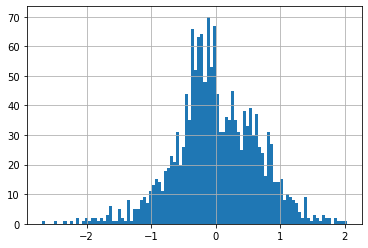

In [9]:
resid.hist(bins=100)

In [11]:
stats.kstest(resid,'norm')

KstestResult(statistic=0.13239369299047485, pvalue=6.696988677321033e-25)

In [15]:
durbin_watson(resid)

1.757140188879304

In [12]:
results = het_white(resid, X)
df={'Lagrange Multiplier statistic':[float(results[0])], 'LM test\'s p-value':[float(results[1])],
    'F-statistic':[float(results[2])], 'F-test\'s p-value':[float(results[3])]}

In [13]:
pd.DataFrame(df)

,Lagrange Multiplier statistic,LM test's p-value,F-statistic,F-test's p-value
0,290.012989,1.896220e-26,4.376436,5.329214e-30
